2026/01/05 by Li.jiahao

Before studying the Shor's Algorithm, let's learn two fundamental theories, quantum phase estimation (QPE) and quantum Fourier transform(QFT). Later on, learning the Shor's Algorithm, we will ubderstand  how the QFT accelates the speed of computation.

# 1.Phase estimation procedure

# 1.1 Warm-up: approximating phases with low precision
Recall the Deutsch-Jozsa Algorithm, we get the result through the phase kick-back. Similarly, we will use the technique here.

We define a controlled operator which satisfies $U|\phi \rangle =\lambda |\phi \rangle $, where $\lambda = e^{2\pi i \theta} and 0< \theta <1$. To solve the phase estimation problem, we create a quantum circuit as shown in the following figure.

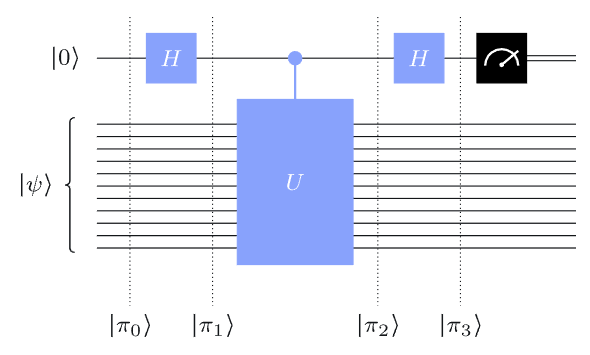

Let's analyze this system, the initial state $|{\pi}_0 \rangle$ is : $$|{\pi}_0 \rangle = |\psi \rangle |0 \rangle$$
And the first H-gate transforms this state to $|{\pi _1} \rangle$: 
$$
| \pi_1 \rangle
= | \psi \rangle | + \rangle
= \frac{1}{\sqrt{2}} | \psi \rangle | 0 \rangle
+ \frac{1}{\sqrt{2}} | \psi \rangle | 1 \rangle
$$
Next, the controlled-U operation is performed, we get state $|{\pi _2} \rangle$: 
$$
| \pi_2 \rangle
= | \psi \rangle | + \rangle
= \frac{1}{\sqrt{2}} | \psi \rangle | 0 \rangle
+ \frac{1}{\sqrt{2}} U| \psi \rangle | 1 \rangle
$$

Using the assumption that $|\psi \rangle $ is the eigenvector of U, state $|{\pi _2} \rangle$ can be written as:
$$
|\pi_2\rangle
= |\psi\rangle \otimes
\frac{1}{\sqrt{2}}\left(|0\rangle + e^{2\pi i \theta}|1\rangle\right)
$$
Finally, after applying the H-gate we get the state $|{\pi _3} \rangle$ :
$$
|\pi_3\rangle
= |\psi\rangle \otimes
\frac{1}{2}\left(
(1 + e^{2\pi i \theta})|0\rangle
+ (1 - e^{2\pi i \theta})|1\rangle
\right)  
$$

From the equation, it is clear that if we measure the top qubit, the probability of outcome 1 or 0 is related to the phase $\theta$:
$$p_0 = \left| \frac{1 + e^{2\pi i \theta}}{2} \right|^2 = \cos^2(\pi \theta) \\
p_1 = \left| \frac{1 - e^{2\pi i \theta}}{2} \right|^2 = \sin^2(\pi \theta)$$ 

We can plot both probability functions as follows.

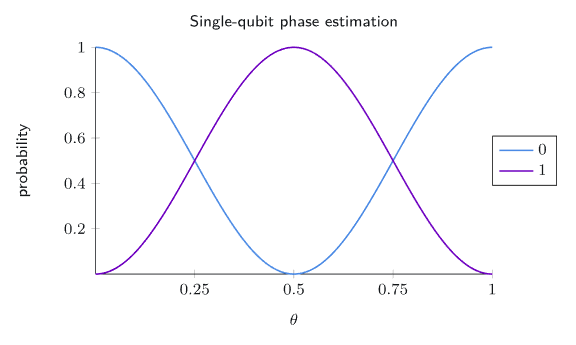

From the probabilities, we can see two special case: 
* 1.If we always measure outcome of 0, which means the $\theta$ is 0. 
* 2.If we always measure outcome of 0, which means the $\theta$ is 0.

However, for any other value of $\theta$, we will get a mix of 0 and 1 outcomes. In this situation, our evaluation is prone to error becuase of two main reasons. First, we can only evaluate by repeating experiment maany times which causes statistical error. Second, we can't distinguish  phase $\theta$ and $1- \theta$, because they produce the same probabilities.In other words, unless $\theta$ is exactly 0 or 1/2, we cannot determine its precise value with 100% certainty using this simple circuit.


## 1.2 Higher precision

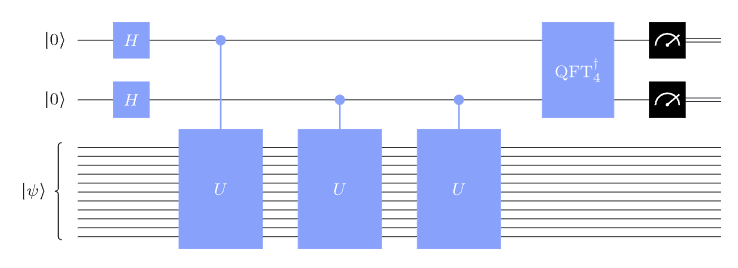

Let's focus on the figure above. Here is the explanation of the circuit: To achieve a higher precision, we introduce a second qubit. Critically, the first qubit controls the U^2 operator. While t he power-of-2 structure is essential for encoding the phase into binary format.The operator controlled by the top qubit, U^2, effectively performs a "bit-shift" on the phase, allowing us to read a more significant bit and thus avoiding the information aliasing we saw in the single-qubit case. This pattern continues, if we introduce the third qubit, it will control the operator $U^{2^{(3-1)} =U^4}$. About the IQFT block, I will introduce it later on.
Let's see the details and explain how the new circuit get higher accuracy.

The initial state can be expressed by $| \pi _1 \rangle$:
$$|\pi_1\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} |a_1 a_0\rangle.$$

Similarly, the state $| \pi _2 \rangle$ is:
$$|\pi_2\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} e^{2\pi i(a_0)\theta} |a_1 a_0\rangle.$$

Finally,the state $| \pi _3 \rangle$ is:
$$|\pi_3\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{a_0=0}^{1} \sum_{a_1=0}^{1} e^{2\pi i(2a_1+a_0)\theta} |a_1 a_0\rangle.$$

Using the binary encoding:$x = 2a_1+a_0$, state $| \pi _3 \rangle$ can be written as:
$$|\pi_3\rangle = |\psi\rangle \otimes \frac{1}{2} \sum_{x=0}^{3}  e^{2\pi i x\theta} |x\rangle = |\psi\rangle \otimes |\phi \rangle.  \ \ (1)$$

Let's consider four special cases, $\theta = 0, 1/4,2/4,3/4$.And we can get the state of the two qubits $|\phi _{4*\theta}\rangle$:
$$
|\phi_0\rangle = \frac{1}{2}|0\rangle + \frac{1}{2}|1\rangle + \frac{1}{2}|2\rangle + \frac{1}{2}|3\rangle \\
|\phi_1\rangle = \frac{1}{2}|0\rangle + \frac{i}{2}|1\rangle - \frac{1}{2}|2\rangle - \frac{i}{2}|3\rangle \\
|\phi_2\rangle = \frac{1}{2}|0\rangle - \frac{1}{2}|1\rangle + \frac{1}{2}|2\rangle - \frac{1}{2}|3\rangle \\
|\phi_3\rangle = \frac{1}{2}|0\rangle - \frac{i}{2}|1\rangle - \frac{1}{2}|2\rangle + \frac{i}{2}|3\rangle
$$
Now, the information of phase is hidden in these states and we need a method to extract it. The method is Inverse Quantum Fourier Transform (IQFT). As we noted, for a single qubit, the IQFT is just an H-gate. Becuase we haven't introduce the QFT in detail yet, I will use a python program to solve it.


--- 2-Qubit IQFT Circuit ---
Instruction(name='qft_dg', num_qubits=2, num_clbits=0, params=[])


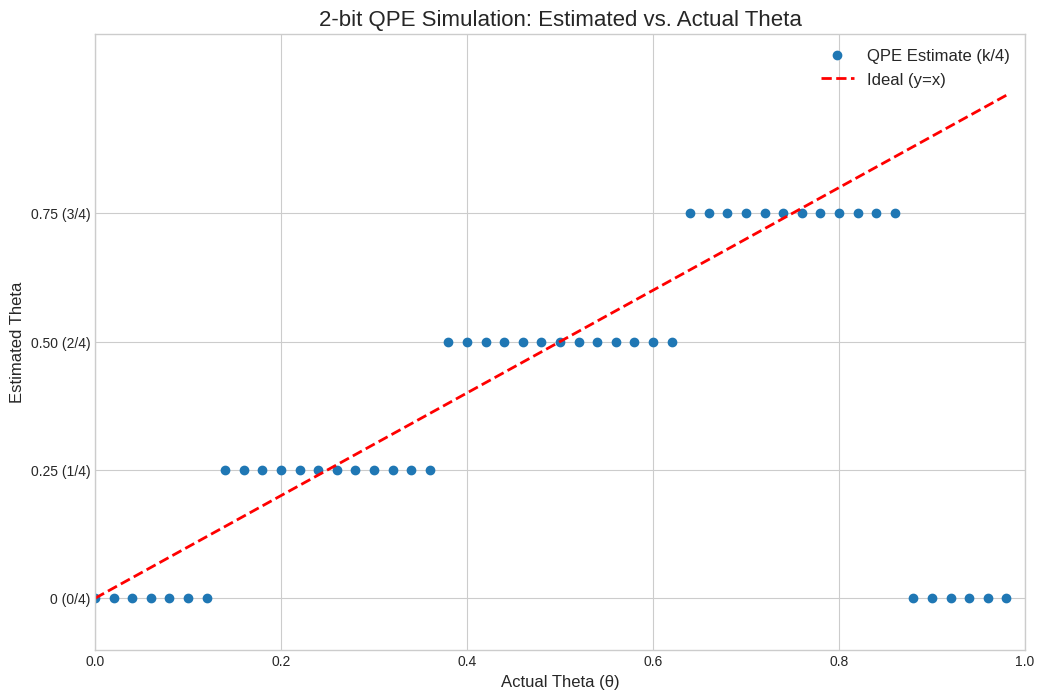

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
from qiskit.quantum_info import Statevector
from qiskit.circuit.library import QFTGate

%matplotlib inline

n_qubits = 2
N = 2**n_qubits

qft_gate = QFTGate(
    num_qubits=n_qubits,
)
iqft_gate = qft_gate.inverse()

print("--- 2-Qubit IQFT Circuit ---")
print(iqft_gate)

# theta range from 0 to 1 with step 0.02
thetas = np.arange(0, 1, 0.02)

# store results
actual_thetas = []
estimated_thetas = []

for theta in thetas:
    # construct the initial statevector
    # 1/sqrt(N) * sum_{j=0}^{N-1} exp(2*pi*i*theta*j) |j>
    j_values = np.arange(N)
    amplitudes = (1/np.sqrt(N)) * np.exp(2 * np.pi * 1j * theta * j_values)
    
    initial_sv = Statevector(amplitudes)

    final_sv = initial_sv.evolve(iqft_gate)
    # display(final_sv.draw('latex'))
    # probabilities() returns the measurement probabilities for each basis state
    probabilities = final_sv.probabilities()
    
    # np.argmax() get the index of the maximum value
    most_probable_outcome = np.argmax(probabilities)
    
    #theta = k / N
    theta_estimated = most_probable_outcome / N
    
    actual_thetas.append(theta)
    estimated_thetas.append(theta_estimated)
0

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(actual_thetas, estimated_thetas, 'o', markersize=6, label='QPE Estimate (k/4)')
ax.plot(actual_thetas, actual_thetas, 'r--', linewidth=2, label='Ideal (y=x)')

ax.set_title(f'{n_qubits}-bit QPE Simulation: Estimated vs. Actual Theta', fontsize=16)
ax.set_xlabel('Actual Theta (θ)', fontsize=12)
ax.set_ylabel('Estimated Theta', fontsize=12)

ax.set_yticks([0, 0.25, 0.5, 0.75])
ax.set_yticklabels(['0 (0/4)', '0.25 (1/4)', '0.50 (2/4)', '0.75 (3/4)'])
ax.set_ylim(-0.1, 1.1)
ax.set_xlim(0, 1)
ax.legend(fontsize=12)

plt.show()

# 2.Quamtum Fourier Transform(QFT)
Similar to the Discrete Fourier Transform(DFT), the QFT is a linear transformation on a quantum state. While the DFT transforms a sequence of numbers (like a time-domain signal) into its frequency components, QFT transfroms a quantum state from the computational basis into FOurier basis.

# 2.1 Definition of the quantum Fourier transform
To define the QFT, we'll first define a complex number $\omega _N$, for each  positive integer N, like this:
$$\omega_N = e^{\frac{2\pi i}{N}} = \cos\left(\frac{2\pi}{N}\right) + i \sin\left(\frac{2\pi}{N}\right).$$
We can understand it as divding the unit circle in a complex plane into N equal parts. For example:
$$\begin{align*}
\omega_1 &= 1 \\
\omega_2 &= -1 \\
\omega_3 &= -\frac{1}{2} + \frac{\sqrt{3}}{2}i \\
\omega_4 &= i \\
\omega_8 &= \frac{1+i}{\sqrt{2}}
\end{align*}$$

The QFT is a unitary operator defined as follows:
$$\text{QFT}_N = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{xy} |x\rangle\langle y|$$
When we apply QFT to a computational basis state $|j\rangle$,the result is:
$$\text{QFT}_N|j\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \omega_N^{xj} |x\rangle\  (1)$$
The transformation takes a computational state and maps it into a uniform superposition of all basis states. The original information, the integer j, is now encoding  in the smoothly varying relative phases of this superposition.

# 2.2 Unitary
We can obtain $\text{QFT}_N ^{\dagger}$ by taking transpose and making complex conjugating of QFT.
* Transpose:$|x\rangle\langle y| \rightarrow |y\rangle\langle x|$.
* complex conjugate: $\omega_N^{xy} = (e^{2\pi i / N})^{xy} \rightarrow (e^{-2\pi i / N})^{xy} = \omega_N^{-xy}$.

So, we get this:
$$\text{IQFT} =  \text{QFT}^\dagger = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} \sum_{y=0}^{N-1} \omega_N^{-xy} |y\rangle\langle x| $$
And we multiply IQFT with QFT, we get :
$$ \text{QFT}^\dagger \text{QFT} = \left( \frac{1}{\sqrt{N}} \sum_{x,y} \omega_N^{-xy} |y\rangle\langle x| \right) \left( \frac{1}{\sqrt{N}} \sum_{z,w} \omega_N^{zw} |z\rangle\langle w| \right) \\
 = \frac{1}{N} \sum_{x,y,z,w} \omega_N^{-xy} \omega_N^{zw} |y\rangle\langle x|z\rangle\langle w| 
$$
According to definition of IQFT, $|x\rangle$ and  $|z\rangle$ are elements of an orthogonal basis. That means their inner product $\langle x|z \rangle = \delta_{xz}  $ equals to 1 where $x=z$ otherwise equals to 0.So we can simplify the equation as follows:
$$ \text{QFT}^\dagger \text{QFT}= \frac{1}{N} \sum_{y,w} \left( \sum_{x=0}^{N-1} \omega_N^{x(w-y)} \right) |y\rangle\langle w| $$
For the summation inside the parentheses, we have:
$ \sum_{x=0}^{N-1} (\omega_N^{w-y})^x $ 
* If $w = y$, $\sum 1 = N$, so to speak, it is constructive interference.
* If $w \neq y$, the sum is 0,it is destructive interference.
Finally, the $ \text{QFT}^\dagger \text{QFT} $ can be simplify to a new description:
$$ = \frac{1}{N} \sum_{y} (N) |y\rangle\langle y| = \sum_{y=0}^{N-1} |y\rangle\langle y| = I $$
As a result, the QFT is a unitary operator.

Noting that:In QPE, we don't use a QFT gate to encode the phase. Instead, we use Phase Kickback as the encoder. This creates a state in the Fourier basis, which the IQFT gate can then efficiently decode back into a computational basis state representing the phase.

## 2.3 Circuit implementation of the QFT
Now, we show how to construct a QFT circuit.For simplicity, we use an iterative construction to build higher-dimensional circuit. Before formally starting, it is necessary to introduce the concept of controlled-phase gates.

 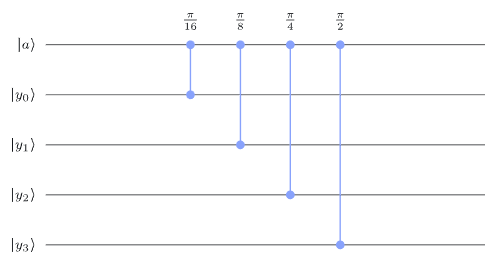

From this figure, we omit the details using a simple line and endpoints to denote a controlled-phase gate. Which means if state $|a\rangle  = |1\rangle$,  a $\pi /16$ relative phase shifting is to be induced to state $|y_0\rangle$.

However, we provide a singer qubit form and a controlled-qubit form of the matrix.
$$P_{\alpha} = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\alpha}
\end{pmatrix} 
\ \ , \ \  
CP_{\alpha} = 
\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & e^{i\alpha}
\end{pmatrix}
$$

Now, return to the figure above. It easy to find the circuit transform the state $|y\rangle|a\rangle$ to $\omega_{2^m}^{ay} |y\rangle|a\rangle$, which means introducing a phase shifting.

Let's consider a 32-dimensional quantum fourier transform figure. 

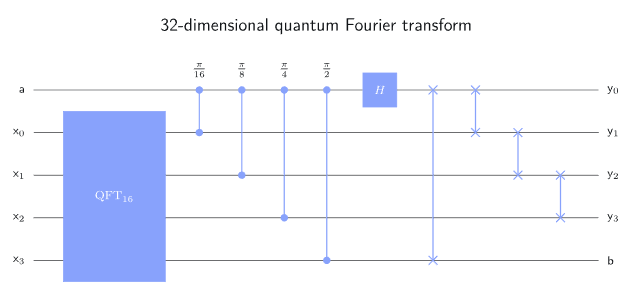

Before we apply the the controlled-phase gates ,the initial state can be described as:
$$\left( \text{QFT}_{2^{m-1}} |x\rangle \right) |a\rangle = \frac{1}{\sqrt{2^{m-1}}} \sum_{y=0}^{2^{m-1}-1} \omega_{2^{m-1}}^{xy} |y\rangle |a\rangle  
\ \ (N = 2^m).$$
And then apply phase rotate , inject the coefficient  $\omega_{2^m}^{ay}$ and system evolves into :
$$ \frac{1}{\sqrt{2^{m-1}}} \sum_{y=0}^{2^{m-1}-1} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} |y\rangle |a\rangle .$$
Since $ b\in \{0, 1\}$, we can rewrite the state as:(this part is somehow abstract, but it can be proved)
$$\frac{1}{\sqrt{2^m}} \sum_{y=0}^{2^{m-1}-1} \sum_{b=0}^{1} (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} |y\rangle |b\rangle.$$
After permuting the order of the qubits,the system evolves into:
$$\frac{1}{\sqrt{2^m}} \sum_{y=0}^{2^{m-1}-1} \sum_{b=0}^{1} (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} |b\rangle |y\rangle.$$

Here, introduce an equation:$$(-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} = \omega_{2^m}^{(2x+a)(2^{m-1}b+y)}.$$(The verification process can be found in https://quantum.cloud.ibm.com/learning/en/courses/fundamentals-of-quantum-algorithms/phase-estimation-and-factoring/phase-estimation-procedure#analysis .I am too lazy to prove in detail.)

The 2^m-dimensional quantum Fourier transform is defined as follows for every ${u\in \{0, 1, ... 2^m-1\}}$,
$$\text{QFT}_{2^m} |u\rangle = \frac{1}{\sqrt{2^m}} \sum_{v=0}^{2^m - 1} \omega_{2^m}^{uv} |v\rangle$$
If we write u and v as:
$$
u=2x+a \\
v=2^{m-1}b+y
$$
Finnally, we obtain a higher dimensional QFT circuit(Here we use the binary encoding):
$$\begin{align*}
\text{QFT}_{2^m}|2x + a\rangle &= \frac{1}{\sqrt{2^m}} \sum_{y=0}^{2^{m-1}-1} \sum_{b=0}^{1} \omega_{2^m}^{(2x+a)(2^{m-1}b+y)} |b2^{m-1} + y\rangle \\
&= \frac{1}{\sqrt{2^m}} \sum_{y=0}^{2^{m-1}-1} \sum_{b=0}^{1} (-1)^{ab} \omega_{2^{m-1}}^{xy} \omega_{2^m}^{ay} |b2^{m-1} + y\rangle.
\end{align*}$$
As mentioned before, the one-dimensional qft is a H-gate. So we can contruct a QFT circuit of arbitrary dimension step by step.

### 2.3.1 Circuit size analysis
We use $s$ to denote the number of the QFT circuit.If m=1, for a Hadamard gate $s_1 = 1$.Everytime we expand the dimension from m-1 to m, circuit needs more m-1 controlled-phase gates , one Hadamard gate and m-1 swap gates.So we obtain a iterator equation:$s_m = s_{m-1} +2m-1$ and $s_m = \sum_{k=1}^{m} (2k - 1) = m^2.$

## 2.4 Bounding the probabilities
If $\theta$ does not take the form of $y/{2^m}$, for any integer y, then an exact estimate cannot be obtained. But we can prove and derive a bound for the measurement probabilities.

According to eqution (1) in 1.2 and (1) in 2.1, we can deduce a QPE system with an arbitrary choice of $\theta$ can be described as :
$$|\psi\rangle \otimes \frac{1}{2^m} \sum_{y=0}^{2^m-1} \sum_{x=0}^{2^m-1} e^{2\pi i x (\theta - y/2^m)} |y\rangle$$

When $\theta - y/2^m$ equals to zero, we can use the method in 1.2 to solve it. If not, we can try to get the probability of mearsuing and see what it is revealing.  
$$p_y = \left| \frac{1}{2^m} \sum_{x=0}^{2^m-1} e^{2\pi i x(\theta-y/2^m)} \right|^2 .$$
For the geometric series summation fomular, we can know that:
$$\sum_{x=0}^{2^m-1} e^{2\pi i x(\theta-y/2^m)} = 
\begin{cases} 
2^m & \theta = y/2^m \\
\\
\frac{e^{2\pi i(2^m\theta-y)}-1}{e^{2\pi i(\theta-y/2^m)}-1} & \theta \neq y/2^m 
\end{cases}$$
Now we consider the case $\theta != y/2^m $, so the probability can be written as：
$$p_y = \frac{1}{2^{2m}} \left| \frac{e^{2\pi i(2^m \theta - y)} - 1}{e^{2\pi i(\theta - y/2^m)} - 1} \right|^2 .$$


We can learn more about these probabilities by thinking about how arc lengths and chord lengths on the unit circle are related($\delta$ is limited in $[-\frac{1}{2},\frac{1}{2}]$).

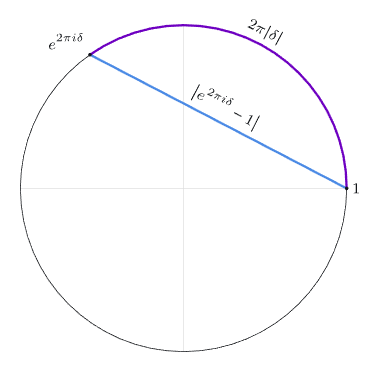

As the figure shows, the chord length can not be longer that arc length. So we can get:
$$|e^{2\pi i\delta} - 1| \le 2\pi|\delta|.$$
And when $\delta = \frac{1}{2}$, the ratio of arc length to chord length is greatest and equals to $\frac{\pi}{2}$.
$$\frac{2\pi|\delta|}{|e^{2\pi i\delta} - 1|} \le \frac{\pi}{2}, \ \  |e^{2\pi i\delta} - 1| \ge 4|\delta|.$$

When $\theta$ is very close to a specific value of $\frac{y}{2^m}$. We describe it as:
$$
    \left| \theta - \frac{y}{2^m} \right| \le 2^{-(m+1)}.
$$
Introducing the previous inference：
$$ \left| e^{2\pi i(2^m \theta - y)} - 1 \right| \ge 4|2^m \theta - y| = 4 \cdot 2^m \cdot \left| \theta - \frac{y}{2^m} \right|.$$
$$ \left| e^{2\pi i(\theta - y/2^m)} - 1 \right| \le 2\pi \left| \theta - \frac{y}{2^m} \right|.$$
We can finally get :
$$p_y \ge \frac{1}{2^{2m}} \frac{16 \cdot 2^{2m}}{4\pi^2} = \frac{4}{\pi^2} \approx 0.405.$$
So at least we can get a probability 40.5% of the measuring outcomes about $\frac{y}{2^m}$ when $\theta $ is close to  $\frac{y}{2^m}$.


Now, supposed  that $y \in \{0, \dots, 2^m - 1\}$ satisfies
$$
    2^{-m} \le \left| \theta - \frac{y}{2^m} \right| \le \frac{1}{2}.
$$
In this situation, $\theta$ is no longer the closest to the $\frac{y}{2^m}$. And we will figure out the probability of obtaining an incorrect result. We can start with the simple observation that:
$$\left| e^{2\pi i(2^m \theta - y)} - 1 \right| \le 2$$

which follows from the fact that any two points on the unit circle can differ in absolute value by at most 2.

We can also use the second observation about arc and chord lengths from above, this time working with the denominator of $p_y$ rather than the numerator, to conclude
$$
    \left| e^{2\pi i(\theta - y/2^m)} - 1 \right| \ge 4\left| \theta - \frac{y}{2^m} \right| \ge 4 \cdot 2^{-m}.
$$
Finally, we get this.
$$ p_y \le \frac{1}{2^{2m}} \frac{4}{16 \cdot 2^{-2m}} = \frac{1}{4}.$$
The probability of obtaining an incorrect result is not higher that 25%.


# 3.Conclusion
QPE and QFT are fundamental cornerstones of quantum algorithms. It is essential not only to understand their operational mechanics but also to derive the probability bounds when the phase is not a power-of-two fraction